In [3]:
%pylab inline

import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Introduction

ANOVA는 Analysis of Variance의 약자로서, 2개 이상의 그룹의 평균을 비교하고자 할때 Anova를 사용합니다.<br>
T-test와 유사한데 차이는 T-test는 2개의 그룹일때만 사용하고, 2개 이상일때는 ANOVA를 사용합니다.

* Tests 
  * Continuous VS Category : ANOVA 사용
  * Category VS Category : Chi-sqaure test 사용
 
* Effect Size (얼마나 관련성이 있는지..) 
  * Continous VS Category: intraclass correlation 사용
  * Category VS Category: Cramer's V 사용

* One-way ANOVA
  * 모든 그룹의 평균값은 동일한가? (예. 연령별 (20대, 30대, 40대, 50대) 에서 커피에 대한 선호도 차이 유무를 검정
  * t-test와 유사하지만, 2개 이상의 그룹을 비교할때 사용할 수 있다. (t-test는 2개만 가능)
  

# ANOVA 

## Grand Mean

$$ \mu_{GM} = \frac{\sum x}{N} = \frac{\sum n \bar{x}}{\sum n} $$

ANOVA에서는 2종류의 평균값이 사용이 됩니다. <br>
첫번째는 각 그룹들의 표본평균 $ \mu_1, \mu_2, \mu_3, ... $  그리고 **grand mean** $ \mu $ 를 사용합니다. <br>
grand mean은 각각의 표본평균들에 대한 평균값이라고 보면 됩니다. 



## Null Hypothesis 

* $ H_0 $ : $ \mu_1 = \mu_2 = .. = \mu_k $ 즉 귀무가설은 모든 그룹의 평균은 정확하게 일치한다 있다. 
* $ H_A $ : $ \mu_l \ne \mu_m $ : 최소한 한개의 그룹은 $ \mu_i $ 는 나머지 그룹과 다은 평균값을 갖고 있다.


$ \mu $ 는 해당 그룹의 평균이고, k는 그룹의 갯수입니다. <br>
$ \mu_l $ 그리고 $ \mu_m $ 은 전체 샘플 중에 아무거나 특정 표본평균을 뜻 합니다.


## Between Group Variability


$$ SS_{\text{between}} = \sum^{k}_{i=1} n_i ( \bar{x}_i - \bar{X}_{GM} )^2 $$ 

* 서로 다른 두개의 그룹을 SS 로 표현을 합니다. -> sample sample ? ㅎㅎ
* 만약 각 그룹간의 표본평균이 서로 가깝다면, Grand Mean 과의 차이도 작을 것 입니다. 
* $ n_i $ 는 각 그룹의 갯수를 사용해서 각각의 제곱편차(squared deviation)에 weight값으로 사용을 합니다. 

쉽게 공식을 풀어 쓰면 다음과 같습니다.

$$ SS_{\text{between}} = n_1 (\bar{x}_1 - \bar{x}_{GM})^2 + n_2 (\bar{x}_2 - \bar{x}_{GM})^2 + n_3 (\bar{x}_3 - \bar{x}_{GM})^2 + ... + n_k (\bar{x}_k - \bar{x}_{GM})^2 $$

아래의 두 표본의 분포를 보면, 서로 겹치는 부분이 있습니다. 각각의 표본평균과 grand mean의 차이는 크지 않을 것 입니다.

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


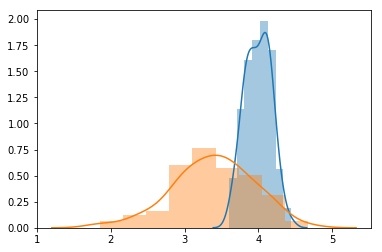

In [4]:
def plot_normal_dist(means, sigmas):
    for i, (sample_mean, sigma) in enumerate(zip(means, sigmas)):
        normal_data = np.random.normal(sample_mean, scale=sigma, size=100)
        sns.distplot(normal_data)

means = [4, 3.5]
sigmas = [0.2, 0.5]
plot_normal_dist(means, sigmas)


반면에 아래의 두 표본분포를 서로 크게 떨어져 있습니다. 이 경우 각각의 표본 평균과 grand mean은 서로 크게 차이가 날 것입니다. 

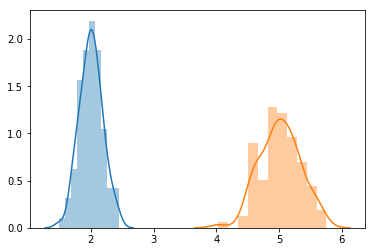

In [50]:
plot_normal_dist([2, 5], [0.2, 0.3])

이렇게 각 표본분포간의 차이를 **Between-group variability** 라고 합니다. 

between-group variability의 경우 자유도는 표본 평균의 갯수 k에 -1 을 한 것입니다.

$$ MS_{\text{between}} = \frac{\sum^{k}_{i=1} n_i(\bar{x}_i - \bar(x)_{GM})}{k-1} $$

* k : 그룹의 갯수

## Within-Group Variability


$$ \begin{align} SS_{\text{within}} &= \sum (n_{1i}-\bar{x}_1) + \sum(n_{2i}-\bar{x}_2) + ... + \sum(n_{ki}-\bar{x}_k) \\
&= \sum (x_{ij} - \bar{x}_j)^2
\end{align} $$

> $ n_{1i} $ 라는 뜻은 첫번째 샘플에서의 i번째의 값을 의미 합니다. <br>
> $ n_{2i} $ 라는 뜻은 두번째 샘플에서의 i번째의 값을 의미 합니다. <br>
> $ n_{ji} $ 라는 뜻은 j번째 샘플에서의 i번째 값을 의미 합니다.

예를 들어서 아래 세개의 표본에 대한 분포를 그렸습니다. <br>
각 그룹들이 옆으로 더 퍼질수록 (variability), 각 그룹들의 분포는 서로 겹치게 되고, 하나의 큰 population이 되게 됩니다.

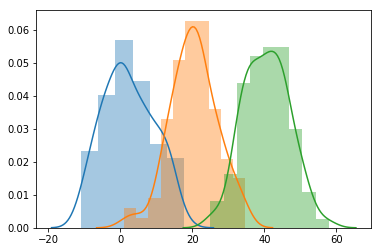

In [14]:
plot_normal_dist([1, 20, 40], [7, 7, 7])

이번에는 위와 동일한 평균값을 갖고 있지만, 적은 변동성 (variability)을 갖고 있는 분포를 보도록 하겠습니다.<br>
위와 동일하게 샘플들간의 표본평균은 동일하지만, 서로 완전히 다른 population에 종속이 되어 있습니다.

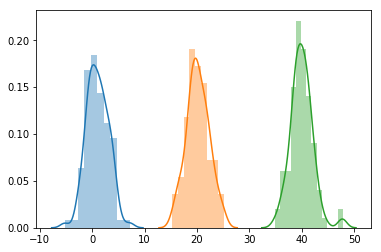

In [18]:
plot_normal_dist([1, 20, 40], [2, 2, 2])

위와 같이 각 샘플안에서의 variation을 **Within-group Variation**이라고 합니다.<br>
즉 Between-group variability는 **각 샘플들 사이의 표본평균의 차**를 구했다면.. <br>
Within-group variation에서는 **각각의 샘플들 마다 존재하는 편차**를 구하게 됩니다.

Between-group variability에서 했듯이, 제곱편차의 합을 **degrees of freedom**으로 나누어 줄수 있습니다. <br>
이렇게 나누어 주면 좀더 덜 편향된 (less biased) estimator를 구할 수 있습니다.<br>

Within-group variability의 degrees of freedom은 전체 샘플 크기들의 합 (sum of the sample sizes) N 에다 샘플듯의 갯수 k 를 빼주게 됩니다.<br>

$$ \text{MS}_{\text{within}} = \frac{\sum (x_{ji} - \bar{x}_i)^2}{N-k} $$

* MS: mean square
* N : 전체 데이터 갯수
* k : 샘플들의 갯수

## F Test 

독립변수와 종속변수 사이의 관계성을 테스트하기 위해서는 F distribution이 사용이 됩니다. 

$$ F = \frac{MS_{between}}{MS_{within}} $$